In [73]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats

mpl.rc('font', family='Malgun Gothic')

In [2]:
master_member = pd.read_csv('master_member.csv')

In [3]:
master_product = pd.read_csv('master_product.csv')

In [6]:
log_order = pd.read_csv('log_order.csv')

In [8]:
master_member.columns

Index(['ID', '나이', '사용가능 적립금', '성별', '주소(동/읍/면)', '최종접속일', '최종주문일', '유입경로',
       '유입기기', '회원 가입일', '사업자구분', '회원구분'],
      dtype='object')

In [11]:
master_product.columns

Index(['#', '공급사', '과세/면세', '담기', '매입가', '상품명(기본)', '상품코드', '재입고알림', '제조사',
       '카테고리', '판매가', '품절여부', '후기'],
      dtype='object')

In [12]:
log_order.columns

Index(['결제수단', '공급원가', '교환구분', '네이버 포인트', '배송번호', '배송비 정보', '배송시작일', '배송완료일',
       '사용한 적립금액', '상품구매금액', '상품명', '상품번호', '상품별 추가할인금액', '수량', '수령인 주소',
       '주문 시 회원등급', '주문경로', '주문번호', '주문일시', '주문자ID', '카드사', '쿠폰 할인금액', '판매가',
       '품목번호'],
      dtype='object')

In [94]:
def func(row):
        if row<30:
                return '20대'
        elif 30<=row<40:
                return '30대'
        elif 40<=row<50:
                return '40대'
        elif 50<=row<60:
                return '50대'
        elif 60<=row<70:
                return '60대'
        elif 70<=row<80:
                return '70대'
        elif 80<=row<90:
                return '80대'
        elif 90<=row:
                return '90대'

df1 = master_member['나이'].apply(func)

In [95]:
df1 = pd.DataFrame(df1.value_counts())

<AxesSubplot:xlabel='나이'>

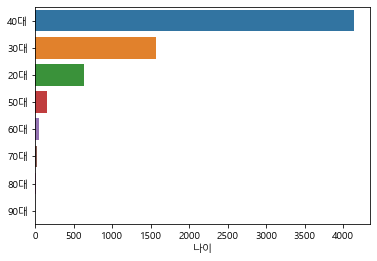

In [105]:
sns.barplot(data=df1, x='나이', y=df1.index)

In [115]:
def func1(row):
        return row.split(' ')[0]

df2 = master_member['주소(동/읍/면)'].astype(str).apply(func1)

In [116]:
df2.value_counts()

경기도        1130
서울특별시       800
nan         634
부산광역시       623
경상남도        545
경상북도        387
강원도         316
충청남도        302
대구광역시       278
인천광역시       272
충청북도        231
전라남도        227
전라북도        201
대전광역시       172
울산광역시       168
광주광역시       158
제주특별자치도      85
세종특별자치시      46
Name: 주소(동/읍/면), dtype: int64

In [121]:
import datetime

In [130]:
def func2(row):
        return row.split('-')[0]
    
master_member['최종주문일'].astype(str).apply(func1).apply(func2).value_counts()

2019    3026
2018    1867
nan     1422
2017     260
Name: 최종주문일, dtype: int64

In [134]:
master_member['최종접속일'].astype(str).apply(func1).apply(func2).value_counts()

2019    3708
2018    2468
2017     346
nan       52
2016       1
Name: 최종접속일, dtype: int64

In [132]:
master_member['성별'].value_counts()

남자    6053
여자     522
Name: 성별, dtype: int64

In [137]:
master_member['유입기기'].value_counts()

PC     3696
모바일    2879
Name: 유입기기, dtype: int64

In [138]:
master_member['사업자구분'].value_counts()

개인     4039
사업자    2534
외국인       2
Name: 사업자구분, dtype: int64

In [140]:
master_member['회원구분'].value_counts()

일반           2575
사업자          2160
전화주문 고객      1668
딜러 유치 회원      132
특별회원           15
딜러             10
일반(수신거부)        6
사업자(수신거부)       4
관리자             4
VIP             1
Name: 회원구분, dtype: int64

In [145]:
master_product['공급사'].value_counts()

패커스        927
다이찌롱스토어     69
(주)니드코      15
다인컴즈         9
Name: 공급사, dtype: int64

In [153]:
def func2(row):
        if row <10000:
                return '0'
        elif 10000<= row<20000:
                return '1'
        elif 20000<= row<30000:
                return '2'
        elif 30000<= row<40000:
                return '3'
        elif 40000<= row<50000:
                return '4'
        elif 50000<= row <60000:
                return '5'
        else:
                return 'over5'
 
master_product['매입가'].apply(func2).value_counts()

0        220
over5    215
1        180
5        112
3        108
2         95
4         90
Name: 매입가, dtype: int64

In [156]:
master_product['제조사'].value_counts()

자체제작           491
은진물산            25
(주)니드코          15
Y-MD-00739       1
Y-MD-00739★      1
Y-MD-00748       1
Name: 제조사, dtype: int64

In [165]:
def func3(row):
        return row.split(':')[1].split('\n')[0]

master_product['카테고리'].apply(func3).value_counts()

 식자재                             472
 한식(분식) 용기                       152
 주방용품/소모품                        141
 베이커리/카페 용기                       72
 실링제품                             48
 NEW                              29
 중식 용기                            25
 주방용품                             15
 소량                               14
 실링용기                             11
 일식 용기                            10
 스티커 제작 > 원형 스티커 > 원형 #1탄 18종      9
 농수산물 용기                           7
 실링기계                              5
 vol.4 Catalogue                   3
 음식종류별                             3
 빨대/커피스틱                           2
 중식 용기 > 면/볶음밥용기                   1
 임시카테고리                            1
Name: 카테고리, dtype: int64

In [168]:
master_product['판매가'].apply(func2).value_counts()

over5    353
1        173
0        166
3         96
2         91
4         72
5         69
Name: 판매가, dtype: int64

In [172]:
master_product['품절여부'].value_counts()

정상    997
품절     23
Name: 품절여부, dtype: int64

In [175]:
log_order['결제수단'].value_counts()

무통장입금                 24171
카드                    13703
적립금,무통장입금              3374
쿠폰,카드                  1306
적립금,카드                 1276
쿠폰,무통장입금               1204
휴대폰                     430
실시간계좌이체                 322
예치금,무통장입금               175
가상계좌                    130
카드,무통장입금                100
카카오페이(카드)                77
쿠폰,휴대폰                   67
페이나우(카드)                 50
예치금,적립금,무통장입금            47
적립금,휴대폰                  37
적립금,가상계좌                 30
예치금,카드                   28
예치금                      25
카카오페이(카카오머니)             22
페이나우(실시간 계좌이체)           21
에스크로(실시간계좌이체)            20
적립금                      16
쿠폰,카카오페이(카드)             16
쿠폰,카드,무통장입금              13
쿠폰,페이나우(카드)              11
무통장입금,휴대폰                 9
적립금,페이나우(카드)              9
예치금,적립금,카드                8
적립금,카카오페이(카드)             7
쿠폰,에스크로(실시간계좌이체)          6
적립금,실시간계좌이체               6
예치금,쿠폰,무통장입금              6
예치금,휴대폰                   5
쿠폰,가상계좌                   4
예치금,쿠폰,카드           

In [177]:
log_order['공급원가'].apply(func2).value_counts()

4        12389
over5     8108
0         7802
5         6522
3         6144
2         3118
1         2666
Name: 공급원가, dtype: int64

In [197]:
log_order['판매가'].apply(func2).value_counts()

over5    25829
0         9549
5         5799
4         2067
3         1428
1         1423
2          654
Name: 판매가, dtype: int64

In [180]:
log_order['배송비 정보'].value_counts()

무료    46319
선불      304
착불      126
Name: 배송비 정보, dtype: int64

In [182]:
log_order[['주문일시','배송시작일','배송완료일']]

,주문일시,배송시작일,배송완료일
0,2018-12-27 오후 2:54,2019-01-07 오전 8:56,2019-01-11 오전 5:32
1,2018-12-29 오후 1:22,2019-01-03 오전 9:30,2019-01-07 오전 5:32
2,2018-12-30 오후 3:15,2019-01-03 오전 9:30,2019-01-07 오전 5:32
3,2018-12-31 오전 10:30,2019-01-03 오전 9:30,2019-01-07 오전 5:32
4,2018-12-31 오전 10:43,2019-01-07 오전 8:56,2019-01-11 오전 5:32
...,...,...,...
46744,2017-12-29 오후 1:39,2017-12-29 오후 4:32,2018-01-02 오전 5:31
46745,2017-12-29 오후 5:16,2018-01-03 오전 9:45,2018-01-07 오전 5:38
46746,2017-12-30 오후 6:56,2018-01-02 오후 7:06,2018-01-11 오전 2:46
46747,2017-12-31 오전 10:00,2018-01-03 오후 2:00,2018-01-06 오후 6:06


In [188]:
log_order['수령인 주소'].astype(str).apply(func1).value_counts()

경기도        8349
서울특별시      5505
부산광역시      5248
경상남도       4823
경상북도       2997
대구광역시      2442
강원도        2221
충청남도       2189
충청북도       1962
인천광역시      1930
대전광역시      1840
전라북도       1822
울산광역시      1567
전라남도       1474
광주광역시      1406
제주특별자치도     527
세종특별자치시     353
경기           57
광주            9
nan           8
서울            7
충북            4
경남            3
인천            2
부산            2
강원            1
경북            1
Name: 수령인 주소, dtype: int64

In [191]:
log_order['주문경로'].value_counts()

PC쇼핑몰     25695
모바일웹      18531
네이버 페이     2523
Name: 주문경로, dtype: int64

In [194]:
log_order['카드사'].value_counts()

삼성               3168
신한(구.LG카드 포함)    3024
현대               2219
비씨               1887
기타               1867
국민               1474
NH (농협)          1116
롯데                910
하나SK              350
외환                236
씨티                165
카카오뱅크              70
광주                 39
신한                 29
신협                 21
전북                 17
제주                 11
수협                  5
국내아멕스               3
Name: 카드사, dtype: int64